# Lab 6

Sierra Wilde and Michael Higgins

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats
import random

In [2]:
#opening the data files
hfhiggs = h5py.File('higgs_100000_pt_1000_1200.h5', 'r')
hfqcd = h5py.File('qcd_100000_pt_1000_1200.h5', 'r')

In [3]:
#loading the data from the files into an array so that it can be used in the notebook
higgs_data = np.array(hfhiggs.get('higgs_100000_pt_1000_1200'))
qcd_data = np.array(hfqcd.get('qcd_100000_pt_1000_1200'))

In [4]:
#creating a table of the Higgs data
higgs_table = pd.DataFrame(higgs_data)
higgs_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
higgs_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
5,1174.455935,0.071862,1.044672,126.188319,0.047449,0.000213,1.989337,0.001517,0.818887,0.185665,0.134878,0.226728,0.726462,0.178298
6,1032.004347,0.178242,-0.334243,132.226981,0.066992,0.000250,0.832268,0.001008,1.048504,0.247989,0.117503,0.236517,0.473825,0.232523
7,1135.787115,0.798256,0.312947,125.914138,0.050225,0.000290,2.289501,0.000402,0.804291,0.491277,0.363850,0.610820,0.740620,0.292758
8,1146.647636,0.250791,0.117854,125.004463,0.061323,0.000206,0.894442,0.000169,1.367819,0.269084,0.200305,0.196725,0.744397,0.203620
9,1024.532082,-0.598499,-2.463925,135.176269,0.067150,0.000308,1.017620,0.001156,1.244498,0.163260,0.130371,0.131186,0.798545,0.233071


In [5]:
#creating a table of the background data
qcd_table = pd.DataFrame(qcd_data)
qcd_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
5,1155.195224,0.003468,-1.625682,298.826804,0.106260,0.003030,2.525106,0.020123,0.717723,0.358535,0.176662,0.499545,0.492732,0.345423
6,1078.106437,-0.972935,2.837172,120.116849,0.047568,0.000325,3.018076,0.001083,1.135965,0.479567,0.354158,0.422167,0.738495,0.125461
7,1159.876486,0.034505,-0.678353,144.697768,0.035045,0.000309,7.180292,0.010588,1.024686,0.761728,0.586193,0.743378,0.769556,0.051010
8,1098.278050,-0.398343,-2.913500,99.670946,0.021586,0.000070,7.004059,0.002613,1.001237,0.624393,0.545976,0.623622,0.874410,0.042698
9,1011.238531,0.833684,2.923444,246.644020,0.135709,0.003229,1.291779,0.001733,1.162754,0.415601,0.292361,0.357428,0.703466,0.365706


In [21]:
#simulating a poisson distribution with a mean of 100
background_pmf = stats.poisson.rvs(100, size=100000)

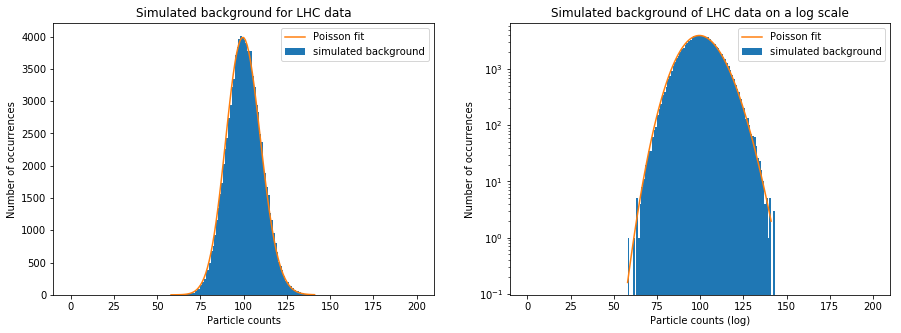

In [47]:
#plotting the background distribution that I simulated with a true poisson pmf as a reference
x = np.arange(background_pmf.min(), background_pmf.max())
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Simulated background for LHC data')
ax[0].set_xlabel('Particle counts')
ax[0].set_ylabel('Number of occurrences')
ax[0].hist(background_pmf, bins=np.arange(0, 201), width=1, label='simulated background');
ax[0].plot(x, 100000*stats.poisson.pmf(x, 100), label='Poisson fit')
ax[0].legend()
ax[1].set_title('Simulated background of LHC data on a log scale')
ax[1].set_xlabel('Particle counts (log)')
ax[1].set_ylabel('Number of occurrences')
ax[1].set_yscale('log')
ax[1].hist(background_pmf, bins=np.arange(0, 201), width=1, label='simulated background');
ax[1].plot(x, 100000*stats.poisson.pmf(x, 100), label='Poisson fit')
ax[1].legend()

## Problem 1

In order to find the 5$\sigma$ value of the simulated background, I must use the fitted pmf in order to be able to calculate the integral under the curve effectively. The integral corresponds to the probability of measuring a range of values, which is related to the 5$\sigma$ threshold. Since I used the Poisson distribution (stats.poisson.rvs) to create 100,000 events with a mean count number of 100, the Poisson pmf (stats.poisson.pmf) with a mean of 100 fits the background. I find the number of counts on the Poisson pmf that, when integrated to $\infty$,  gives a probability associated with measuring a signal 5$\sigma$ away from the mean or greater of a Gaussian distribution with a mean of 0 and a standard deviation of 1. This gives the upper limit 5$\sigma$, and to get the lower limit, I do the same thing, just with a probability of -5$\sigma$ of lower. Since a Gaussian distribution is symmetric, these probabilities are the same, but since a Poisson distribution is not always symmetric, the values might not be the same distance away from the mean.

In [50]:
#using stats.norm.sf to get the probability of measuring 5sigma or greater of a Gaussian
prob_5sigma = stats.norm.sf(5)

#using stats.poisson.isf and stats.poisson.ppf to get the upper and lower limits, respectively of the 5sigma threshold on the background distribution
upper_threshold = stats.poisson.isf(prob_5sigma, 100)
lower_threshold = stats.poisson.ppf(prob_5sigma, 100)
print('The upper limit 5 sigma theshold is {} and the lower limit 5 sigma threshold is {} for the LHC background.'.format(upper_threshold, lower_threshold))

The upper limit 5 sigma theshold is 154.0 and the lower limit 5 sigma threshold is 54.0 for the LHC background.


## Problem 2

In [52]:
#finding the 8 sigma threshold
prob_8sigma = stats.norm.sf(8)
threshold = stats.poisson.isf(prob_8sigma, 100)
print('The 8 sigma value of this distribution is {}'.format(threshold))

The 8 sigma value of this distribution is 190.0


In [65]:
#making a list of random indices to apply to the background
indices = []
for i in range(0, 100000):
    indices.extend([random.randint(0, len(background_pmf)-1)])

#adding the random values from the background to a signal of 190
obs_sig = background_pmf[indices] + 190

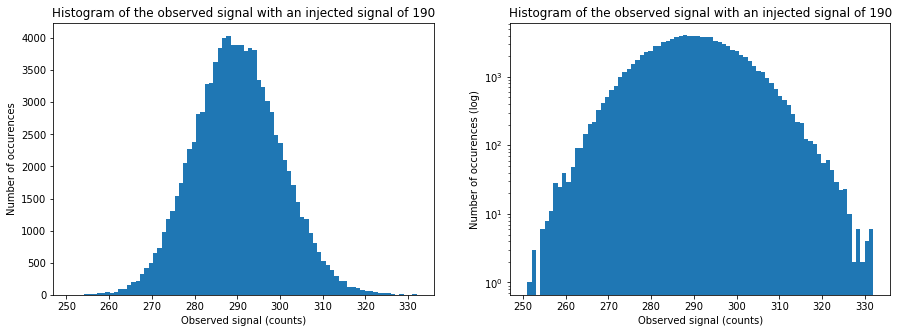

In [69]:
#plotting the observed signal and the background
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Histogram of the observed signal with an injected signal of 190')
ax[0].set_xlabel('Observed signal (counts)')
ax[0].set_ylabel('Number of occurences')
ax[0].hist(obs_sig, bins=80)
ax[1].set_title('Histogram of the observed signal with an injected signal of 190')
ax[1].set_xlabel('Observed signal (counts)')
ax[1].set_ylabel('Number of occurences (log)')
ax[1].hist(obs_sig, bins=80)
ax[1].set_yscale('log')

In [70]:
print('The mean of the observed signal is {}'.format(np.mean(obs_sig)))

The mean of the observed signal is 290.03125


Since the mean of the observed signal is about 290, and the injected signal is 190, the observed signal is biased by the mean of the background distribution, 100. 

WRITE MORE

## Problem 3

In [117]:
# finding the distributions of a range of sigma values
signals = np.arange(0, 1000)
obs_signals = np.array([background_pmf[indices] + each for each in signals])
#creating an array of each signal that is as long as the observed signal array
signal_array = np.array([])
for signal in signals:
    new_array = np.array([signal for i in range(0, len(obs_signals[0]))])
    signal_array = np.concatenate((signal_array, new_array))

I am only making integer signals, because the signal is particle counts. This is different than the example in class which was done with a Gaussian distribution, which is a continuous distribution, and thus measurements can be continuous.

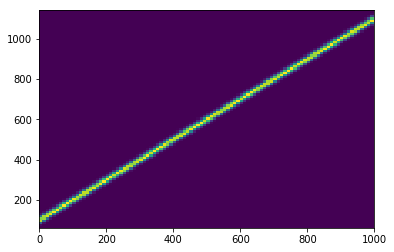

In [124]:
#plotting the 2-d histogram of injected signal vs observed signal
plt.figure()
plt.hist2d(signal_array, obs_signals.flatten(), bins = [100, 100]);